## Hybrid Sim V2

In [24]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [65]:
# Set a random seed for reproducibility (if not required comment out line)

np.random.seed(38)

In [ ]:
# Define constants
MAGENTA = 'M'
YELLOW = 'Y'
chromosome_length = 15 # Total number of positions (loci) on the chromosome 

In [39]:
#Option to change recombination probability. 

use_uniform_recomb = True  # Change to False to use custom recombination prob.

if use_uniform_recomb:
    recomb_probs = [0.1] * chromosome_length  # Same recombination probability across all positions
    # 10% chance
else:
    recomb_probs = [0.01, 0.05, 0.2, 0.2, 0.05, 0.01, 0.01, 0.05, 0.2, 0.2, 0.05, 0.01, 0.01, 0.05, 0.01]


### Parent generation

In [40]:
# Define parent chromosomes (individuals)
magenta_parent = [[MAGENTA] * chromosome_length, [MAGENTA] * chromosome_length]  # MM -> 2
yellow_parent = [[YELLOW] * chromosome_length, [YELLOW] * chromosome_length]  # YY -> 0

In [ ]:
# Checkpoint 

print(magenta_parent)
print(yellow_parent)

### F1 generation

In [42]:
# Function to generate F1 population individuals (MY -> 1)
def generate_f1_population(n):
    f1_population = [] # Create empty list to store F1 individuals 
    for _ in range(n): # Loop 'n' times to generate 'n' F1 individuals
        strand1 = magenta_parent[0]  # Take strand 1 from magenta
        strand2 = yellow_parent[1]   # Take strand 2 from yellow
        # Combine the two strands to form diploid F1 offspring
        f1_population.append([strand1.copy(), strand2.copy()])
    return f1_population # Return list of F1 individuals 

# Create 'n' number of individuals using the function above
f1_offspring = generate_f1_population(n=10)

In [ ]:
# Checkpoint 

print(f1_offspring)

In [61]:
# Pick two distinct F1 parents at random from F1 population
parent_indices = np.random.choice(len(f1_offspring), 2, replace=False) # The same individual can not be picked twice.

# Get the F1 individual corresponding to the first selected index 
parent_a = f1_offspring[parent_indices[0]]
# Get the F1 individual corresponding to the second selected index
parent_b = f1_offspring[parent_indices[1]]

In [ ]:
# Checkpoint

print(parent_a)
print(parent_b)

In [62]:
# Checkpoint

print(parent_indices)

[2 4]


### F2 generation

In [52]:
# Simulate F2 offspring
# Create an empty list for new F2 strands
strand_1 = []
strand_2 = []

# Randomly choose which F1 parent to start with for creating the F2
strand_1_source = np.random.choice([0, 1])  # 0 = parent A, 1 = parent B
strand_2_source = np.random.choice([0, 1])

# Loop through each position (locus) in the chromosome 
for i in range(chromosome_length):

    #For strand 1, randomly select if recombination happens at this position based on the recomb_prob.
    #If yes, switch the source parent for this strand. 
    if i > 0 and np.random.rand() < recomb_probs[i]:
        strand_1_source = 1 - strand_1_source # Work between parent 0 and 1 

    # For strand 2, do the same as above and change where required. 
    if i > 0 and np.random.rand() < recomb_probs[i]:
        strand_2_source = 1 - strand_2_source

    # Append allele from designated parent and position. 
    # Dependent on the source parent. 
    strand_1.append(parent_a[strand_1_source][i] if strand_1_source == 0 else parent_b[strand_1_source][i])
    strand_2.append(parent_a[strand_2_source][i] if strand_2_source == 0 else parent_b[strand_2_source][i])

In [53]:
# Compute genotype numeric representation
# Create a list to store numeric data
f2_chromosome = []

# Loop through alleles at each position from both strands at the same time.
for a, b in zip(strand_1, strand_2):

    # Combine into pairs and assign numeric genotype
    pair = sorted([a, b])
    if pair == ['M', 'M']:
        f2_chromosome.append(2)
    elif pair == ['Y', 'Y']:
        f2_chromosome.append(0)
    else:
        f2_chromosome.append(1)

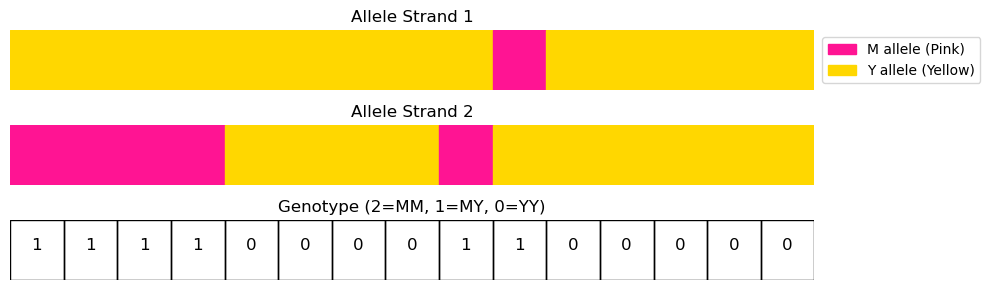

In [58]:
# Visualise chromosome
# Define colours 
color_map = {'M': 'deeppink', 'Y': 'gold'}
# Create a figure with horizontal subplots (one for each strand + genotype)
fig, axs = plt.subplots(3, 1, figsize=(10, 3), sharex=True)

# Titles for each subplot
axs[0].set_title("Allele Strand 1") # First haploid strand
axs[1].set_title("Allele Strand 2") # Second haploid strand 
axs[2].set_title("Genotype (2=MM, 1=MY, 0=YY)") # Numerical genotype 

# Draw coloured rectangles for each allele in strand 1
for i, allele in enumerate(strand_1):
    axs[0].add_patch(mpatches.Rectangle((i, 0), 1, 1, color=color_map[allele]))
# Same for strand 2 
for i, allele in enumerate(strand_2):
    axs[1].add_patch(mpatches.Rectangle((i, 0), 1, 1, color=color_map[allele]))
# Display numeric genotype 
for i, val in enumerate(f2_chromosome):
    axs[2].text(i + 0.4, 0.5, str(val), fontsize=12)
    axs[2].add_patch(mpatches.Rectangle((i, 0), 1, 1, edgecolor='black', facecolor='white', fill=False))

# Clean plot - remove axis etc. 
for ax in axs:
    ax.set_xlim(0, chromosome_length)
    ax.set_ylim(0, 1)
    ax.axis('off')

# Add a legend
legend_handles = [
    mpatches.Patch(color='deeppink', label='M allele (Pink)'),
    mpatches.Patch(color='gold', label='Y allele (Yellow)')
]
axs[0].legend(
    handles=legend_handles,
    loc='center left',           # Position the legend to the right of the plot
    bbox_to_anchor=(1.01, 0.5),  # Shift it just outside the plotting area
    borderaxespad=0.,            # Reduce padding between plot and legend
    frameon=True                 # Optional: draw a box around the legend
)

# Avoid layout overlap and display the graph
plt.tight_layout()
plt.show()

In [55]:
# Output for inspection

print("Allele Strand 1:", strand_1)
print("Allele Strand 2:", strand_2)
print("F2 Chromosome Genotype:", f2_chromosome)

Allele Strand 1: ['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'M', 'Y', 'Y', 'Y', 'Y', 'Y']
Allele Strand 2: ['M', 'M', 'M', 'M', 'Y', 'Y', 'Y', 'Y', 'M', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y']
F2 Chromosome Genotype: [1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0]
